# Quora Duplicates Detection

In [32]:
%load_ext autoreload
%autoreload 2

import pandas, numpy, nltk, itertools, collections
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [2]:
src_data = pandas.read_csv('./train.csv',
                           index_col=['id'])

In [7]:
print 'total samples', src_data.shape[0]
print 'total questions', len(set(src_data.qid1.unique()) | set(src_data.qid2.unique()))
print 'total positive', numpy.count_nonzero(src_data.is_duplicate)
print 'pos/neg', numpy.count_nonzero(src_data.is_duplicate) / float(numpy.count_nonzero(~src_data.is_duplicate))

total samples 404290
total questions 537933
total positive 149263
pos/neg 0.369197853026


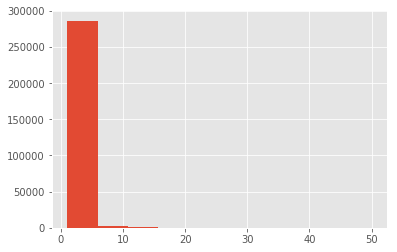

In [10]:
src_data.qid1.groupby(by=src_data.qid1).count().hist()

In [73]:
LEMMATIZER = nltk.stem.wordnet.WordNetLemmatizer()
PARSER = nltk.parse.MaltParser('/notebook/maltparser-1.8.1/',
                               model_filename='/notebook/engmalt.linear-1.7.mco',
                               tagger=nltk.pos_tag)
Word = collections.namedtuple('Word', 'form lemma pos dep role'.split(' '))

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif treebank_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN

def parse_sent(txt):
    forms = nltk.wordpunct_tokenize(txt.lower())
    pos = [tag for _, tag in nltk.pos_tag(forms)]
    lemmas = [LEMMATIZER.lemmatize(w, pos=get_wordnet_pos(p)) for w, p in itertools.izip(forms, pos)]
    #PARSER.parse_sents([txt])
    return forms
    #return map(Word, itertools.izip(forms, lemmas, pos, deps, roles))
parse_sent('What is the step by step guide to invest in share market in india?')

['what',
 'is',
 'the',
 'step',
 'by',
 'step',
 'guide',
 'to',
 'invest',
 'in',
 'share',
 'market',
 'in',
 'india',
 '?']

In [75]:
g = PARSER.parse_one(parse_sent('What is the step by step guide to invest in share market in india?'))

OSError: [Errno 2] No such file or directory

In [35]:
??

In [26]:
LEMMATIZER.lemmatize??